In [9]:
from utils import *
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import torch_geometric.transforms as T


In [5]:
names = ['BC', 'DC', 'PR', 'EC', 'CC']
centrality_map = [None] * len(names)
num_points = 11  # Number of points on graph
max_vals, min_vals = [None] * len(names), [None] * len(names)
splits = [None] * len(names)
percentile = 90
percentile_vals = [None] * len(names)
counts = [None] * len(names)
bin_edges = [None] * len(names)


In [6]:
def calculate_centralities(G):
    centrality_map[0] = nx.betweenness_centrality(G, k=100, normalized=True, weight=None, endpoints=False, seed=42)
    centrality_map[1] = nx.degree_centrality(G)
    centrality_map[2] = nx.pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, dangling=None)
    centrality_map[3] = nx.eigenvector_centrality(G, max_iter=10000, tol=1e-06, nstart=None, weight=None)
    centrality_map[4] = nx.closeness_centrality(G, u=None, distance=None, wf_improved=True)

    for i in range(len(names)):
        centrality_map[i] = list(centrality_map[i].values())
        

In [7]:
def define_range_splits(): 
    for i in range(len(names)):
        max_vals[i], min_vals[i] = max(centrality_map[i]), min(centrality_map[i])
        percentile_vals[i] = np.percentile(centrality_map[i], percentile)
        splits[i] = np.linspace(min_vals[i], percentile_vals[i], num_points - 1).tolist()
        splits[i].append(max_vals[i])


In [8]:
def plot_graph():
    _, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 20))
    axes = axes.flatten()

    for i in range(len(names)):
        counts[i], bin_edges[i] = np.histogram(centrality_map[i], bins=splits[i])
        print(names[i])
        print(counts[i])
        print(bin_edges[i])
        bars = axes[i].bar(range(0,10), counts[i])
        axes[i].set_title(names[i])
        
        for bar in bars:
            height = bar.get_height()
            axes[i].annotate(f'{height}',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')


    plt.tight_layout()

    plt.show()


Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])
BC
[2041  232   97   70   31   32   31   22   16  136]
[0.         0.00087009 0.00174017 0.00261026 0.00348035 0.00435043
 0.00522052 0.00609061 0.0069607  0.00783078 0.23588977]
DC
[485 583 553 389 281 131  82  57   0 147]
[0.00036941 0.00069778 0.00102615 0.00135451 0.00168288 0.00201125
 0.00233961 0.00266798 0.00299635 0.00332471 0.06206132]
PR
[319 509 577 523 289 162 107  54  32 136]
[0.00010922 0.00017874 0.00024827 0.0003178  0.00038733 0.00045685
 0.00052638 0.00059591 0.00066543 0.00073496 0.01220657]
EC
[2383  100   35   17    2    1    0    0   34  136]
[7.40293027e-33 5.46688724e-03 1.09337745e-02 1.64006617e-02
 2.18675489e-02 2.73344362e-02 3.28013234e-02 3.82682106e-02
 4.37350979e-02 4.92019851e-02 6.54299696e-01]
CC
[223   0   0   5  92 230 606 837 579 136]
[0.00036941 0.02081935 0.04126928 0.06171922 0.08216915 0.10261909
 0.12306902 0.14351896 0.16396889 0.184

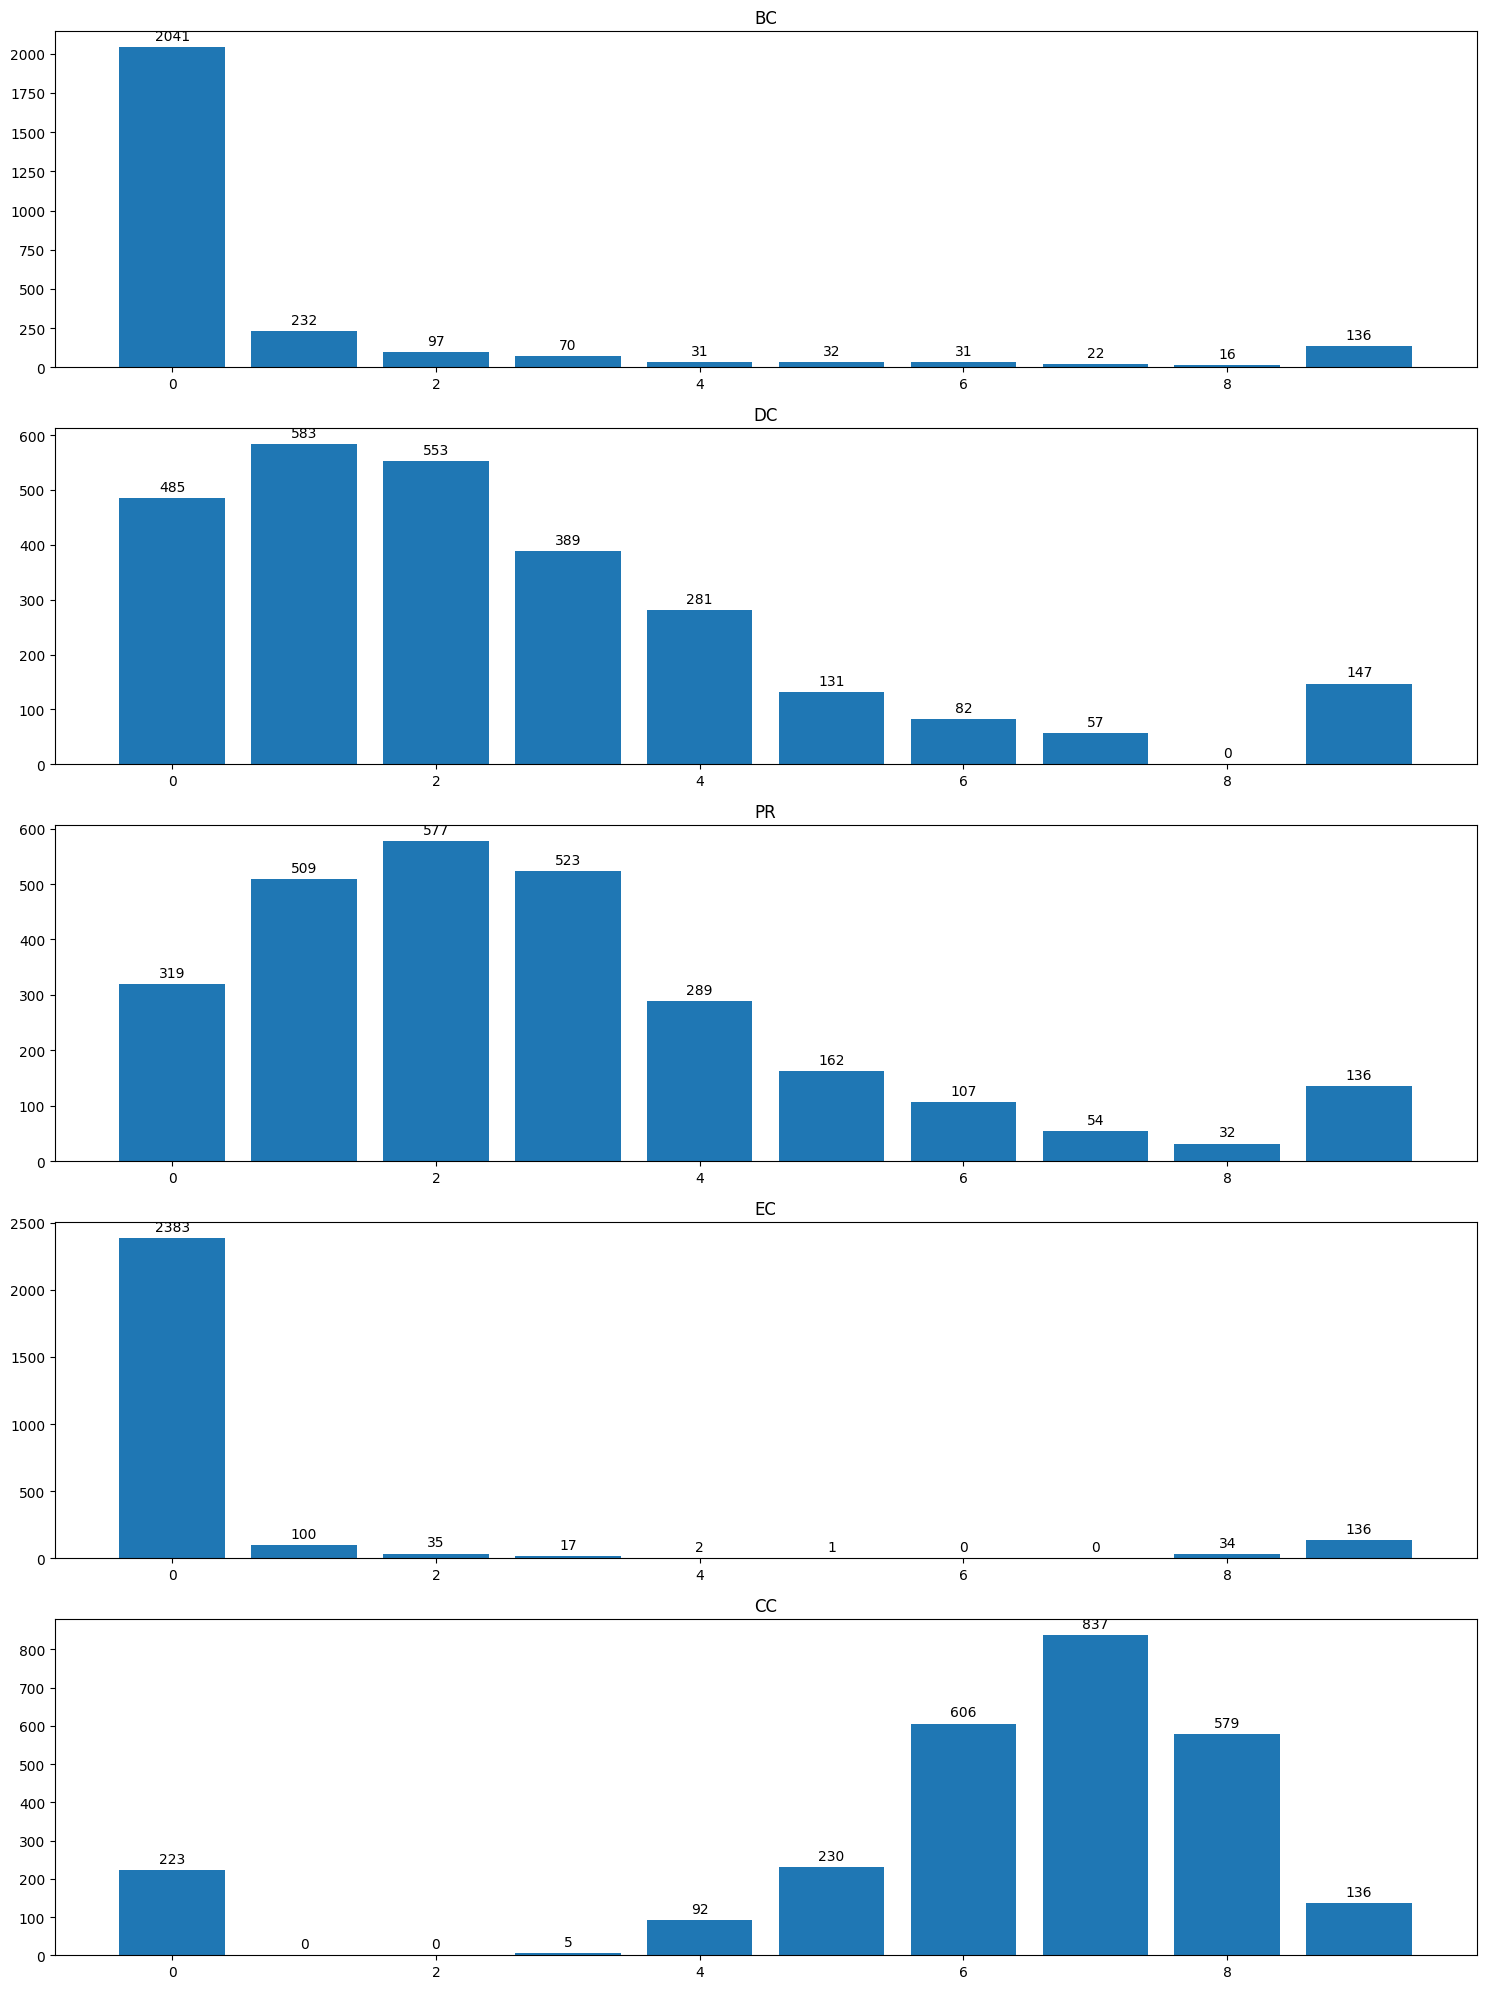

In [10]:
# Planetoid dataset analysis
dataset_name = "Cora"
dataset = Planetoid(root=f'data/Planetoid/{dataset_name}', name=dataset_name, transform=T.NormalizeFeatures())
data = dataset[0]

G = to_networkx(data, to_undirected=True, remove_self_loops=True)
print(data)
percentile = 95
calculate_centralities(G)
define_range_splits()
plot_graph()

# CiteSeer scale factors
# bc = [10, 12, 14, 16, 18]
# cc = [6, 8, 10, 12, 14]
# dc = [29, 31, 33, 35, 37]
# ec = [1.2, 1.6, 2.0, 2.4, 2.8]

# Cora scale factors
# bc = [3, 4, 5, 6, 7]
# cc = [3.5, 4.0, 4.5, 5.0, 5.5]
# dc = [12, 14, 16, 18, 20]
# ec = [1.1, 1.3, 1.5, 1.7, 1.9]